# Project Sprint 7 : Telecomunication Service Package

## Introduction

In this project, an analysis will be carried out on the behavior of customers of the latest Megaline packages. The data provided is in the form of monthly `Smart` and `Ultra` package usage for each user.

From this historical data, a model will then be developed to recommend suitable package options for new customers.

###  Goal

The aim of this project is to develop a predictive model that provides the highest possible accuracy above the `0.75`. The models developed are Decision Tree, Random Forest, and Logistic Regression.

### Steps

Data penggunaan paket tiap pelanggan disimpan dalam filepath : `/datasets/users_behavior.csv`

To train and develop the model, data analysis and pre-processing are first carried out in the first stage, then initial data exploration is carried out, and finally training and developing a model that has high accuracy. This project will consist of four main stages:
1. Data Overview and Pre-Processing
2. Data Exploration
3. Training and Model Development
4. General Conclusion

### Overview

**1. Introduction**
- Objective
- Stages
- List of contents

**2. Data Overview and Pre-Processing**
- Initialization
- Loading Dataset
- Preparing Dataset

**3. Data Exploration**
- `Calls`
- `Minutes`
- `Messages`
- `Mb_used`
- Tentative conclusions

**4. Model Development**
- Prepare `training_set`, `validation_set`, `test-set`
- Decision Tree Model
- Random Forest Model
- Logistic Regression Model
- Tentative conclusions

**5. General Conclusion**

## Data Overview and Pre-Processing

### Initialization

To carry out data analysis and pre-processing as well as data exploration, a library is first loaded that can help with these activities, namely:
1. `Pandas` Library
2. `Matplotlib` Library

In [3]:
# Memuat library pandas
import pandas as pd

# Muat matplotlib library
from matplotlib import pyplot as plt

### Loading Dataset

The initial user package usage data is stored in .csv format in the filepath: `/datasets/users_behavior.csv`. The data will be loaded and stored in the variable `df`.

In [4]:
# Memuat dataset penggunaan paket dan menyimpannya dalam variabel df
df = pd.read_csv('/datasets/users_behavior.csv')

### Preparing Dataset

In [5]:
df.head(15)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [6]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Based on general information and the display of sample data, several descriptions of the data set are known:
- The dataset totals **3124**, which can then be called observations (number of package users) and **5** columns.
- The number of *non-null* for each column is the same as the index range, which indicates that there are no missing values in the entire column, but will be confirmed again using the **.isna()** method.
- The minimum value in the `calls`, `minutes`, `message` and `mb_used` columns is `0`, which means that there are some users who do not use one or more of these packages at all.
- The initial dataset I have is quite good, but we will confirm again whether there is explicit duplication of data and how large the amount is using the **.duplicated()** method.

In [8]:
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [9]:
df.duplicated().sum()

0

The initial dataset is very good; there are no `missing_values` in each column, and there are no duplications. The next step is to prepare the dataset to train and validate the developed model.

## Data Exploration

Based on the project description, the `is_ultra` column information is the package option used by each user, with details:
1. `0` - user is on **Smart** plan
2. `1` - user is on **Ultra** plan

Next, you will see the percentage of Smart and Ultra package users.

In [10]:
# menampilkan persentase pengguna paket smart dan ultra
df_paket = df['is_ultra'].value_counts()
data_percent = df['is_ultra'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
prop_paket = pd.DataFrame(data={"percent%" : data_percent, "count" : df_paket}).rename_axis('paket')
prop_paket

,percent%,count
paket,,
0,69.35%,2229
1,30.65%,985


Based on the data above, information is obtained that there are more users of the `Smart` package than the `Ultra` package, namely 69.35%, which is quite a large number. This information is quite useful in the *splitting data* stage to get a `training_set` that is proportional and fairly representative.

Next, we will see the distribution of `calls`, `minutes`, `message`, and `mb_used` usage data from each user of the `Smart` and `Ultra` packages. To facilitate data visualization, service usage data for each package is first collected. For data visualization, we will use a **boxplot** diagram.

### Calls

In [11]:
# mengambil data penggunaan layanan telepon dan pilihan paket
calls = df[['calls', 'is_ultra']]
calls

,calls,is_ultra
0,40.0,0
1,85.0,0
2,77.0,0
3,106.0,1
4,66.0,0
...,...,...
3209,122.0,1
3210,25.0,0
3211,97.0,0
3212,64.0,0


Text(0, 0.5, 'Jumlah panggilan')

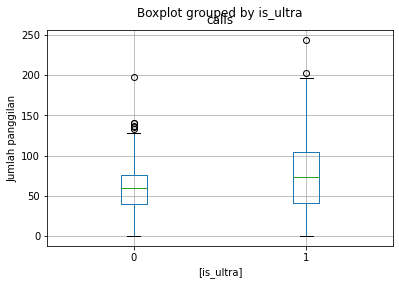

In [12]:
# menampilkan boxplot penggunaan laanan telepon masing-masing paket smart dan ultra
calls.boxplot(by='is_ultra')

plt.ylabel('Jumlah panggilan')

Based on the graph above, information is obtained that generally, users of the `Ultra` package tend to use telephone call services more than users of the `Smart` package.

Next, we explore the call duration column `minutes`.

### Minutes

In [13]:
# mengambil data durasi panggilan dan pilihan paket
duration = df[['minutes', 'is_ultra']]
duration

,minutes,is_ultra
0,311.90,0
1,516.75,0
2,467.66,0
3,745.53,1
4,418.74,0
...,...,...
3209,910.98,1
3210,190.36,0
3211,634.44,0
3212,462.32,0


Text(0, 0.5, 'Durasi panggilan')

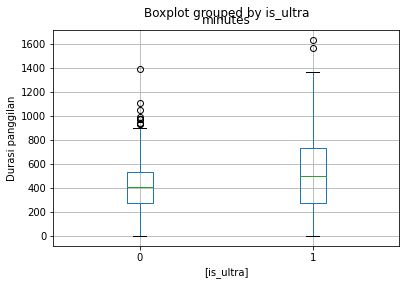

In [14]:
# menampilkan boxplot penggunaan laanan telepon masing-masing paket smart dan ultra
duration.boxplot(by='is_ultra')

plt.ylabel('Durasi panggilan')

Almost similar to the number of calls, `Ultra` package users tend to have longer call durations than `Smart` package users.

Next, we explore the `messages` column.

### Messages

In [15]:
# mengambil data jumlah pengiriman pesan dan pilihan paket
messages = df[['messages', 'is_ultra']]
messages

,messages,is_ultra
0,83.0,0
1,56.0,0
2,86.0,0
3,81.0,1
4,1.0,0
...,...,...
3209,20.0,1
3210,0.0,0
3211,70.0,0
3212,90.0,0


Text(0, 0.5, 'Jumlah pesan')

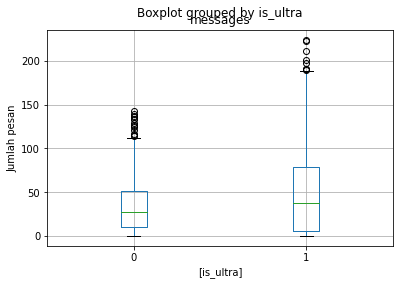

In [16]:
# menampilkan boxplot penggunaan laanan telepon masing-masing paket smart dan ultra
messages.boxplot(by='is_ultra')

plt.ylabel('Jumlah pesan')

Based on the graph above, information is obtained that users of the `Ultra` package tend to send more messages than users of the `Smart` package.

Next, we explore the `mb_used` column.

### Mb_used

In [17]:
# mengambil data jumlah pengiriman pesan dan pilihan paket
internet = df[['mb_used', 'is_ultra']]
internet

,mb_used,is_ultra
0,19915.42,0
1,22696.96,0
2,21060.45,0
3,8437.39,1
4,14502.75,0
...,...,...
3209,35124.90,1
3210,3275.61,0
3211,13974.06,0
3212,31239.78,0


Text(0, 0.5, 'Internet session')

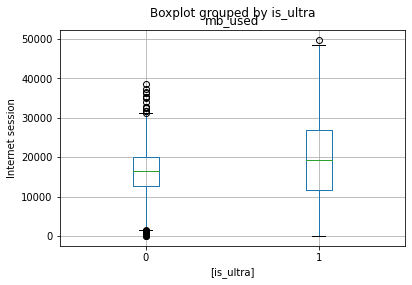

In [18]:
# menampilkan boxplot penggunaan laanan telepon masing-masing paket smart dan ultra
internet.boxplot(by='is_ultra')

plt.ylabel('Internet session')

Based on the graph above, information is obtained that *internet sessions* users of the `Ultra` package tend to be more numerous than users of the `Smart` package.

### Conclusion

Based on an exploration of package usage data from each telephone, messaging, and internet service, it can be concluded that `Ultra` package users tend to use more package service quotas than `Smart` package users, and this happens in all `calls` services, ` messages` and `internet`. From this information, we get a little idea that users who spend large service quotas tend to use the `Ultra` package; however, to recommend the best package choice, a predictive model that has high accuracy needs to be developed. This activity will be carried out in the next stage.

## Model Development

To develop a predictive model, several datasets are needed, including:
1. `training_set` - as historical data to train the initial model
2. `validation_set` - as data to validate the trained model
3. `test_set` - as data for testing the model that has been developed

At this stage, what is done first is to prepare the three data sets from the data sets that have been loaded and save them in the `df` variable.

### Preparing `training_set`, `validation_set`, dan `test_set`.

According to the results of previous data exploration, it is known that information on the percentage of packages used by users is stored in the `prop_paket` variable.

In [19]:
# menampilkan variabel prop_paket
prop_paket

,percent%,count
paket,,
0,69.35%,2229
1,30.65%,985


It is known that the proportion of `Smart` and `Ultra` packages is 69.35% and 30.65%, respectively, and three datasets are needed, which come from the `df` data set; therefore, *splitting* the data will use the help of the **StratifiedShuffleSplit** function from the Sklearn library to get results *splitting* the data obtained is proportional and representative of the initial data_set.

The proportion of training, validation, and test data is as follows:
1. Training_set - `df_train` **60%**
2. Validation_set - `df_valid` **20%**
3. Test_set - `df_test` **20%**

In [5]:
# mengimport StratifiedShuffleSplit dari modul model_selection library sklearn
from sklearn.model_selection import StratifiedShuffleSplit

# melakukan splitting data menjadi df_tmp dan df_valid
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for tmp_ids, valid_ids in split.split(df, df['is_ultra']):
    df_tmp = df.loc[tmp_ids]
    df_valid = df.loc[valid_ids]

In [21]:
# melakukan splitting data menjadi df_train dan df_test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25)
for train_ids, test_ids in split.split(df_tmp, df_tmp['is_ultra']):
    df_train = df.loc[train_ids]
    df_test = df.loc[test_ids]

Next, the results of *splitting* the data are displayed, and the proportions are seen.

In [22]:
# menampilkan dataset df_train 
df_train

,calls,minutes,messages,mb_used,is_ultra
2146,106.0,806.68,72.0,12970.66,0
1172,144.0,1031.79,99.0,40174.34,1
2496,89.0,648.40,18.0,4436.91,1
1778,70.0,430.40,81.0,15071.46,0
1844,86.0,630.51,54.0,14496.74,0
...,...,...,...,...,...
243,121.0,765.61,53.0,21445.05,1
2427,80.0,584.75,0.0,20571.44,0
2509,56.0,344.70,17.0,16544.65,0
1024,100.0,709.40,17.0,16964.33,0


In [23]:
# menampilkan dataset df_valid
df_valid

,calls,minutes,messages,mb_used,is_ultra
458,63.0,368.31,32.0,14986.58,0
1284,29.0,192.29,73.0,14620.52,0
1212,95.0,578.24,29.0,20622.44,0
945,50.0,350.20,20.0,22219.70,0
2724,70.0,466.68,38.0,12924.89,0
...,...,...,...,...,...
1750,28.0,169.93,49.0,21232.14,0
350,65.0,423.06,40.0,18625.97,0
2256,0.0,0.00,42.0,13280.45,1
379,51.0,426.24,112.0,5661.23,0


In [24]:
# menampilkan dataset df_test
df_test

,calls,minutes,messages,mb_used,is_ultra
2142,68.0,403.58,28.0,19210.63,0
377,56.0,390.22,40.0,19645.63,0
1685,91.0,610.21,20.0,16218.51,0
2068,45.0,312.80,0.0,42986.70,1
624,43.0,352.82,0.0,19746.09,0
...,...,...,...,...,...
1002,35.0,197.96,45.0,21425.84,0
2097,98.0,554.94,54.0,29488.01,1
513,72.0,535.56,47.0,21684.88,0
242,183.0,1247.04,150.0,29186.41,1


In [25]:
# menampilkan proporsional kolom is_ultra dataset df_train
df_train['is_ultra'].value_counts() / len(df_train)

0    0.696577
1    0.303423
Name: is_ultra, dtype: float64

In [26]:
# menampilkan proporsional kolom is_ultra dataset df_valid
df_valid['is_ultra'].value_counts() / len(df_valid)

0    0.693624
1    0.306376
Name: is_ultra, dtype: float64

In [27]:
# menampilkan proporsional kolom is_ultra dataset df_valid
df_test['is_ultra'].value_counts() / len(df_test)

0    0.682737
1    0.317263
Name: is_ultra, dtype: float64

The proportionality between the 3 new datasets and the initial data set for the `is_ultra` package column is quite similar. The three datasets are ready to be used in the machine learning model development stage

Next, to develop the model, **features** and **target** data will be prepared from each dataset.

In [28]:
# menyiapkan feature_train dan target_train dari dataset df_train
df_train_features = df_train.drop('is_ultra', axis=1)
df_train_target = df_train['is_ultra']

In [29]:
# menyiapkan feature_validation dan target_validation dari dataset df_valid
df_valid_features = df_valid.drop('is_ultra', axis=1)
df_valid_target = df_valid['is_ultra']

In [30]:
# menyiapkan feature_test dan target_test dari dataset df_test
df_test_features = df_test.drop('is_ultra', axis=1)
df_test_target = df_test['is_ultra']

### Decision Tree Model

The first model developed was **decision tree**. The tools that will be used are taken from the **sklearn** library of the **tree** class **DecisionTreeClassifier** class. The evaluation metric used is **accuracy** according to the criteria in the project description.

In [31]:
# mengimport kelas decisiontreeclassifier dari modul tree di library scikit-learn
from sklearn.tree import DecisionTreeClassifier

# mengimport fungsi perhitungan accuracy dari library sklearn
from sklearn.metrics import accuracy_score

The next step is training and developing the model. To develop the model, the tree depth hyperparameter or max_depth will be tuned.

In [32]:
# melatih model dengan features dan target df_train dan melakukan tunning hyperparameter model decisiontree 
for depth in range (1,8):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(df_train_features, df_train_target)
    prediction_valid = model.predict(df_valid_features)
    
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(df_valid_target, prediction_valid))

max_depth = 1 : 0.7651632970451011
max_depth = 2 : 0.7931570762052877
max_depth = 3 : 0.8118195956454122
max_depth = 4 : 0.8118195956454122
max_depth = 5 : 0.8149300155520995
max_depth = 6 : 0.8180404354587869
max_depth = 7 : 0.8258164852255054


The results are quite good, the accuracy obtained is more than 0.75 where the best model accuracy is obtained **0.80** at a depth of `max_depth = 6`. The results of this hyperparameter tuning will be applied to model predictions on the df_test dataset.

Next, model testing will be carried out on the df_test dataset.

In [33]:
# melatih model hasil tunning hyperparameter max_depth = 6
model_1 = DecisionTreeClassifier(random_state=12345, max_depth=6)
model_1.fit(df_train_features, df_train_target)
prediction_valid = model_1.predict(df_valid_features)

# melakukan testing model untuk prediksi target pada dataset df_test
prediction_test = model_1.predict(df_test_features)

# menghitung skor akurasi validation dan test
valid_accr = accuracy_score(df_valid_target, prediction_valid)
test_accr = accuracy_score(df_test_target, prediction_test)

print('Accuracy :')
print('Validation_set :', valid_accr)
print('Test_set :', test_accr)

Accuracy :
Validation_set : 0.8180404354587869
Test_set : 0.7776049766718507


The **sanity_check** results of the decision tree model get almost similar accuracy values between Validation_set and Test_set.

Next, the **Random Forest** model will be developed to see whether the second model has a better level of accuracy than the **Decision Tree** model.

### Random Forest Model

The second model developed is the **Random Forest** model. The tools that will be used are taken from the **sklearn** library of the **ensemble** module. The evaluation metric used is **accuracy**.

In [34]:
# mengimport RandomForestClassifier dari modul ensemble di library scikit-learn
from sklearn.ensemble import RandomForestClassifier

The next step is training and developing the model. To develop the model, hyperparameter tuning for the number of trees or *n_estimators* will be carried out.

In [35]:
# melatih model dengan features dan target df_train dan melakukan tunning hyperparameter n_estimators
best_score = 0
best_est = 0
for est in range(1,10):
    model = RandomForestClassifier(random_state=54321, n_estimators=est)
    model.fit(df_train_features, df_train_target)
    score = model.score(df_valid_features, df_valid_target)
    if score > best_score:
        best_score = score
        best_est = est
print("Accuracy model terbaik pada dataset df_valid (n_estimators = {}): {}".format(best_est, best_score))

Accuracy model terbaik pada dataset df_valid (n_estimators = 9): 0.8989113530326595


The results are quite good; the accuracy obtained is more than 0.75, where the best model accuracy is obtained at **0.89** with `n_estimators = 7`. The results of this hyperparameter tuning will be applied to model predictions on the df_test dataset.

Next, model testing will be carried out on the df_test dataset.

In [36]:
# melatih model hasil tunning hyperparameter n_estimators=7
model_2 = RandomForestClassifier(random_state=54321, n_estimators=7)
model_2.fit(df_train_features, df_train_target)
prediction_valid = model_2.predict(df_valid_features)

# melakukan testing model untuk prediksi target pada dataset df_test
prediction_test = model_2.predict(df_test_features)

# menghitung skor akurasi validation dan test
valid_accr = accuracy_score(df_valid_target, prediction_valid)
test_accr = accuracy_score(df_test_target, prediction_test)

print('Accuracy :')
print('Validation_set :', valid_accr)
print('Test_set :', test_accr)

Accuracy :
Validation_set : 0.8880248833592534
Test_set : 0.76049766718507


The accuracy on the Test_set dataset is indeed quite good, amounting to 0.77 more than expected, but the accuracy is much lower than the validation dataset, which indicates that there is overfitting in this model.

The next stage was the development of the **Logistic Regression** model.

### Logistic Regression Model

The third model developed is the **Logistic Regression** model. The tools that will be used are taken from the **sklearn** library of the **linear_model** module. The evaluation metric used is **accuracy**.

In [37]:
# mengimport LogisticRegression dari modul linear_model di library scikit-learn
from sklearn.linear_model import LogisticRegression

The next step is training and developing the model. To train the model, the chosen solver parameter is `liblinear`,which is suitable for small datasets.

In [38]:
# melatih model regresi logistik dengan solver liblinear
model_3 = LogisticRegression(random_state = 54321, solver ='liblinear')
model_3.fit(df_train_features, df_train_target)

# menghitung skor akurasi dataset validation dan test
score_valid = model_3.score(df_valid_features, df_valid_target)
score_test = model_3.score(df_test_features, df_test_target)

print("Accuracy Validation_set:", score_valid)
print("Accuracy Test_set:", score_test)

Accuracy Validation_set: 0.702954898911353
Accuracy Test_set: 0.6936236391912908


The accuracy score of test_set is almost the same as validation_set, but the value is quite low, below 0.75.

### Conclusion

Based on the results of model development, the best model with a high level of accuracy and not experiencing overfitting or underfitting is the **DecisionTree** model with hyperparameter tuning at **max_depth=6**.

## General Conclusion

The dataset obtained is historical data on Megaline package service users, which consists of 3214 rows and 5 columns. Based on the results of the initial exploration, the following information was obtained:
1. The quality of the dataset is good enough that there are no missing values and no duplication.
2. There are some users who have never used one or more megaline package services.
3. Users of the `Ultra` package tend to use more services than users of the `Smart` package.


From this dataset, *splitting* the data is then carried out with the help of the **StratifiedShuffleSplit** function to obtain the `Training`, `Validation`, and `Test` datasets, which will be used for training and model development. There are three models developed, namely:
1. Decision Tree
2. Random Forest
3. Logistic Regression

Based on the development results, a **Decision Tree** model was obtained with a fairly high level of accuracy of **0.80** without any *overfitting / underfitting* when the predictive model was applied to the test dataset.